In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.rcParams.update({'font.size': 15})

In [19]:
# List of participants, collapse.
# Junior (-40), medior (41-50), senior (51+)

maq_people = [
    ('mediator'   , True , 'male'  , 'junior', 'M' , True ), # Chiel
    ('consul'     , True , 'female', 'junior', 'AQ', False), # Ingrid
    ('defender'   , False, 'female', 'junior', 'AQ', False),
    ('consul'     , True , 'male'  , 'medior', 'AQ', True ),
    ('protagonist', False, 'male'  , 'senior', 'M' , True ),
    ('consul'     , False, 'male'  , 'medior', 'AQ', True ),
    ('architect'  , False, 'female', 'junior', 'AQ', True ),
    ('logistician', True , 'male'  , 'medior', 'M' , False),
    ('entertainer', False, 'female', 'junior', 'M' , True ),
    ('advocate'   , False, 'female', 'junior', 'AQ', False),
    ('mediator'   , False, 'male'  , 'medior', 'AQ', False),
    ('mediator'   , False, 'male'  , 'senior', 'M' , False),
    ('adventurer' , False, 'male'  , 'medior', 'M' , True ),
    ('logistician', False, 'male'  , 'junior', 'M' , True ),
    ('campaigner' , False, 'male'  , 'senior', 'AQ', False),
    ('debater'    , False, 'male'  , 'senior', 'AQ', False),
    ('defender'   , False, 'male'  , 'senior', 'M' , False)
]

df = pd.DataFrame(maq_people, columns=['type', 'TT', 'gender', 'age', 'MAQ', 'football'])

In [20]:
# Plot function make_plot(data_frame, title)
types = [
    'virtuoso', 'adventurer', 'entrepreneur', 'entertainer',
    'logistician', 'defender', 'executive', 'consul',
    'advocate', 'mediator', 'protagonist', 'campaigner',
    'architect', 'logician', 'commander', 'debater',
]

def make_plot(df, title):
    counter = np.zeros(16, dtype=np.int)
    for i in range(len(types)):
        counter[i] = df['type'].str.count(types[i]).sum()
    counter.shape = (4, 4)
    
    vmin, vmax = 0., counter.max() / counter.sum() if not df.empty else 1.
    
    plt.figure(figsize=(12,10))
    plt.pcolormesh(
        counter if df.empty else counter / counter.sum(),
        cmap=plt.cm.Reds, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.title('{0}, count = {1}'.format(title, counter.sum()))
    
    labels = [''] * 9
    labels[2], labels[6] = 'introvert', 'extravert'
    plt.gca().set_xticklabels(labels)
    
    labels = [''] * 9
    labels[3], labels[7] = 'pragmatic', 'abstract'
    plt.gca().set_yticklabels(labels)
    plt.yticks(rotation=90)
    
    for i in range(16):
        ic, jc = i % 4 + 0.5, i // 4 + 0.5
        plt.text(ic, jc, types[i], ha='center', va='center', color='k')
    plt.show()

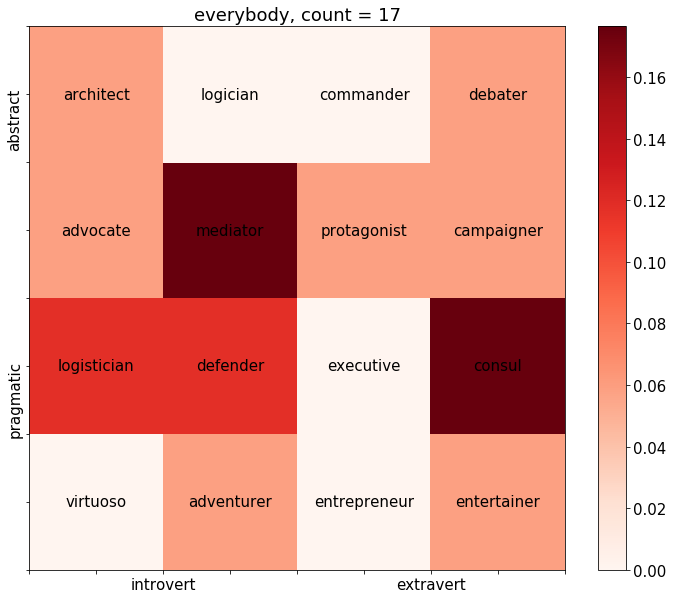

In [26]:
make_plot(df, 'everybody')

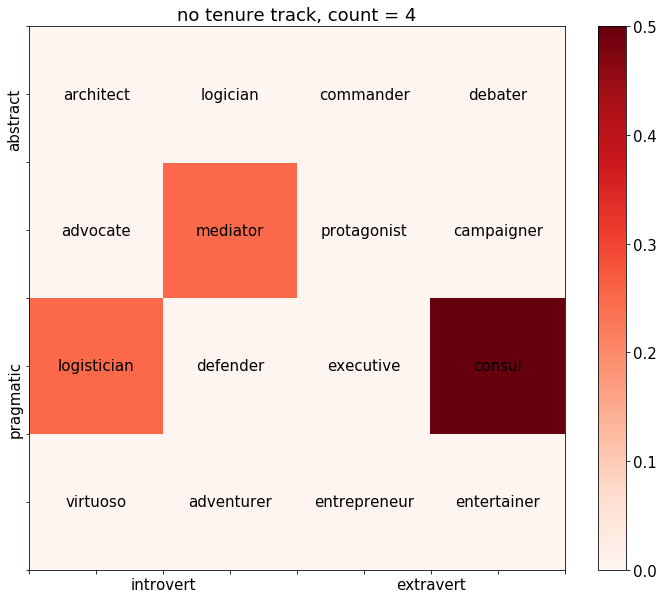

In [22]:
df_no_tt = df.loc[df['TT'] == True]
make_plot(df_no_tt, 'no tenure track')

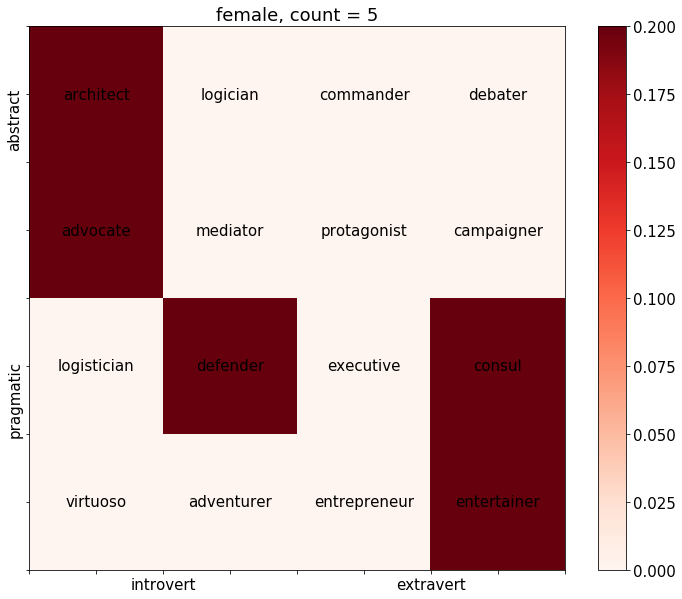

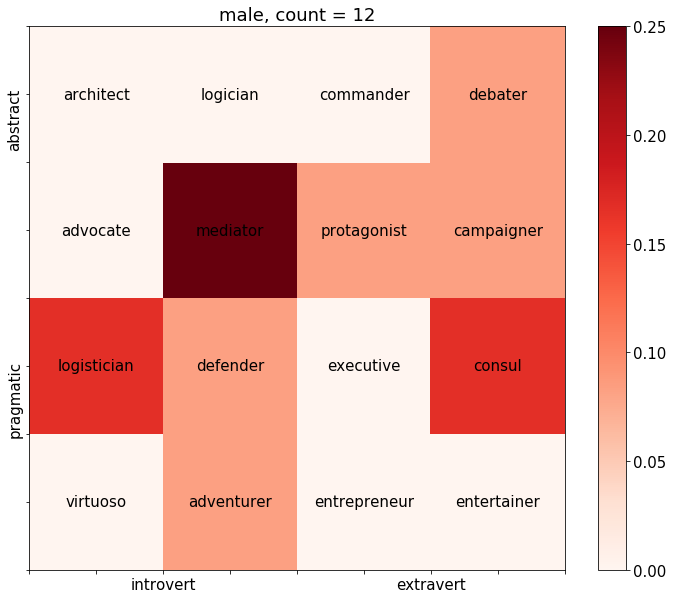

In [27]:
df_female = df.loc[df['gender'] == 'female']
df_male   = df.loc[df['gender'] == 'male']
make_plot(df_female, 'female')
make_plot(df_male, 'male')

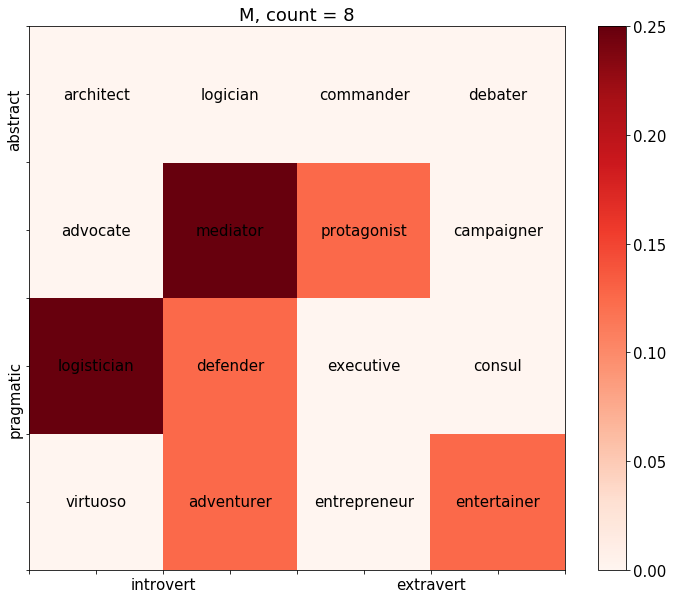

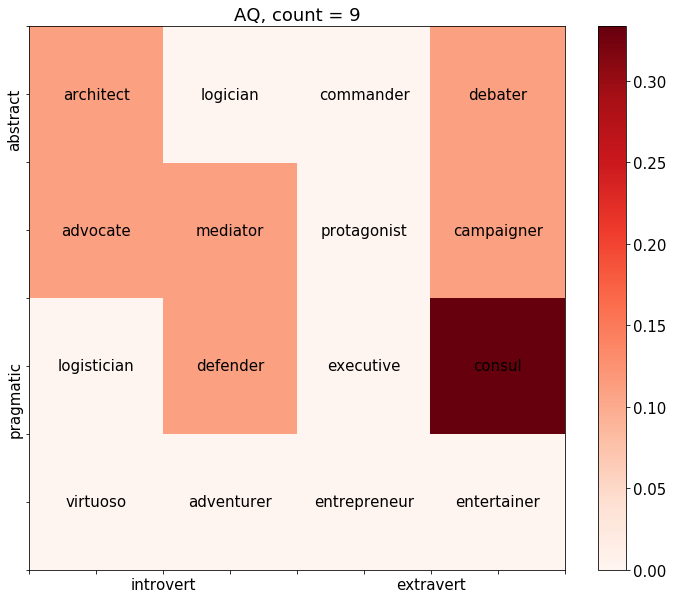

In [24]:
df_m = df.loc[ (df['MAQ'] == 'M') ]
df_aq = df.loc[ (df['MAQ'] == 'AQ') ]
make_plot(df_m, 'M')
make_plot(df_aq, 'AQ')

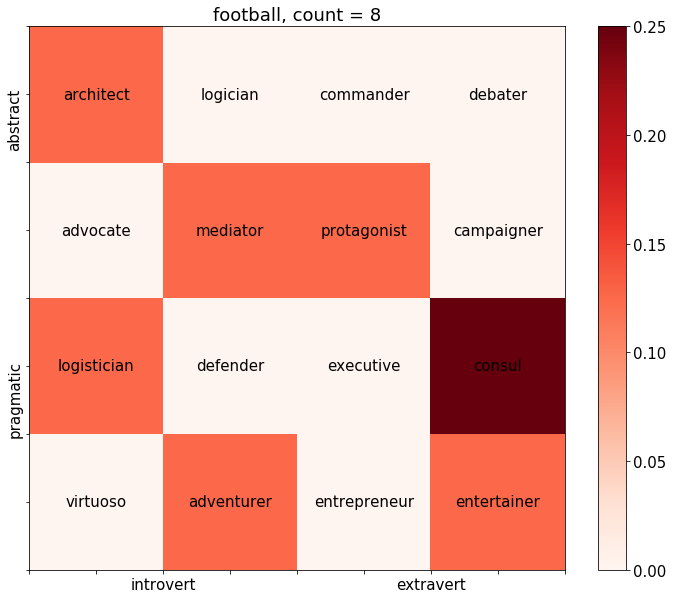

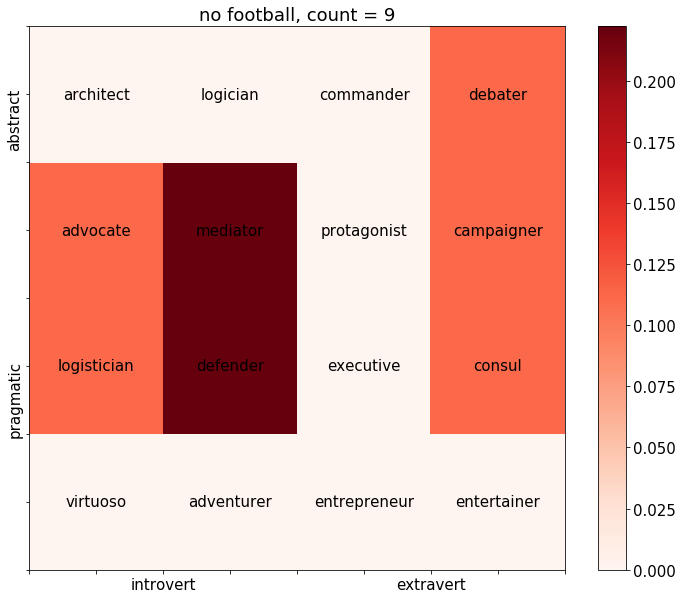

In [25]:
df_fb = df.loc[ (df['football'] == True) ]
df_nf = df.loc[ (df['football'] == False) ]
make_plot(df_fb, 'football')
make_plot(df_nf, 'no football')